In [1]:
#example using model_alerting_and_performance_evaluation.py
#GOAL: 1. tau based on percentile 2. cost stuff (gain)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

In [3]:
%load_ext autoreload
%autoreload 1
%aimport model_alerting_and_performance_evaluation
mape = model_alerting_and_performance_evaluation

In [4]:
#need to generate data that has 4 columns:
# each row represents the output for a given patient enounter at a set time-step
# eID: encounterID - this is what groups a patient's encounter (encounter) together
# p: the probability (risk estimate) for each encounter time-step
# y: the true label for that encounter (assume that there's only 1 label fper encounter)
# observer: the observer who would see an alert for that given encounter time-step (e.g. the primary contact physician)

# assumes that data are in ascending temporal order
# assumes one there's one observer per encounter time-step

#TODOS:
# add time-step functionality
# assumes 

# simulate data

In [5]:
#generate underlying risk (p)
rng = np.random.default_rng()
n = 200

p = rng.uniform(size=n)
y = rng.binomial(1, p)

l = rng.integers(2, 10, size=n)
n_t = sum(l)

e_t = rng.normal(0.0, 0.1, size=n_t)

In [6]:
#generate risk estimates for every encounter time-step
ci = []
cp = []
co = []
cy = []

n_obs = 3

for i, p_i in enumerate(p):
    _l = rng.integers(2,10)
    e_t = rng.normal(0.0, 0.1, size=_l)
    
    ci += [i]*_l
    cp += list(p_i + e_t.cumsum())
    cy += [y[i]]*_l
    
    o_i = [i]*_l
    o_i_mod = rng.binomial(1, 0.1, size=_l).cumsum()
    o_i += o_i_mod
    o_i = o_i%n_obs
    
    co += list(o_i)

In [7]:
# turn it into a dataframe with the following columns: 'eID', 'p', 'y', 'observer'
df = pd.DataFrame({'eID':ci, 'p':cp, 'y': cy, 'observer':co})
df.head()

,eID,p,y,observer
0,0,0.978154,1,0
1,0,1.123361,1,0
2,0,1.069872,1,0
3,0,1.109887,1,0
4,0,1.011350,1,0


# overall performance

In [8]:
_ = df.groupby(by='eID').max()
metrics.roc_auc_score(_['y'], _['p'])

0.7684

# compute alerts and performance

In [9]:
ap_res, oc_res = mape.compute_alerts_and_performance(df, return_oc_res=True, tau_on_percentile=True)
ap_res.head()

,tau,tn,fp,fn,tp,oa_max,oa_min,oa_mean,oa_med,oa_sum,sens,spec,ppv,npv,proportion_unalerted
0,0.000000,0,100,0,100,69,65,66.666667,66.0,200,1.0,0.00,0.500000,NaN,0.000
1,0.041667,1,99,0,100,68,65,66.333333,66.0,199,1.0,0.01,0.502513,1.0,0.005
2,0.083333,5,95,0,100,67,64,65.000000,64.0,195,1.0,0.05,0.512821,1.0,0.025
3,0.125000,9,91,0,100,64,63,63.666667,64.0,191,1.0,0.09,0.523560,1.0,0.045
4,0.166667,13,87,0,100,63,62,62.333333,62.0,187,1.0,0.13,0.534759,1.0,0.065


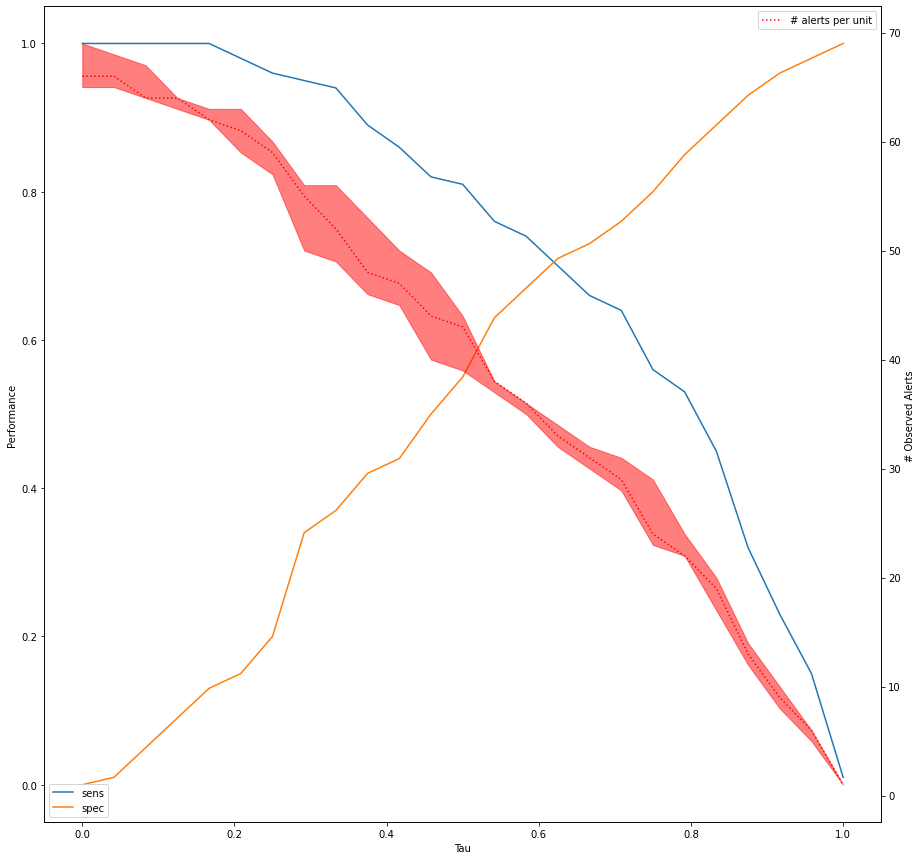

In [10]:
mape.plot_alerts_and_performance(ap_res)

# tradeoff

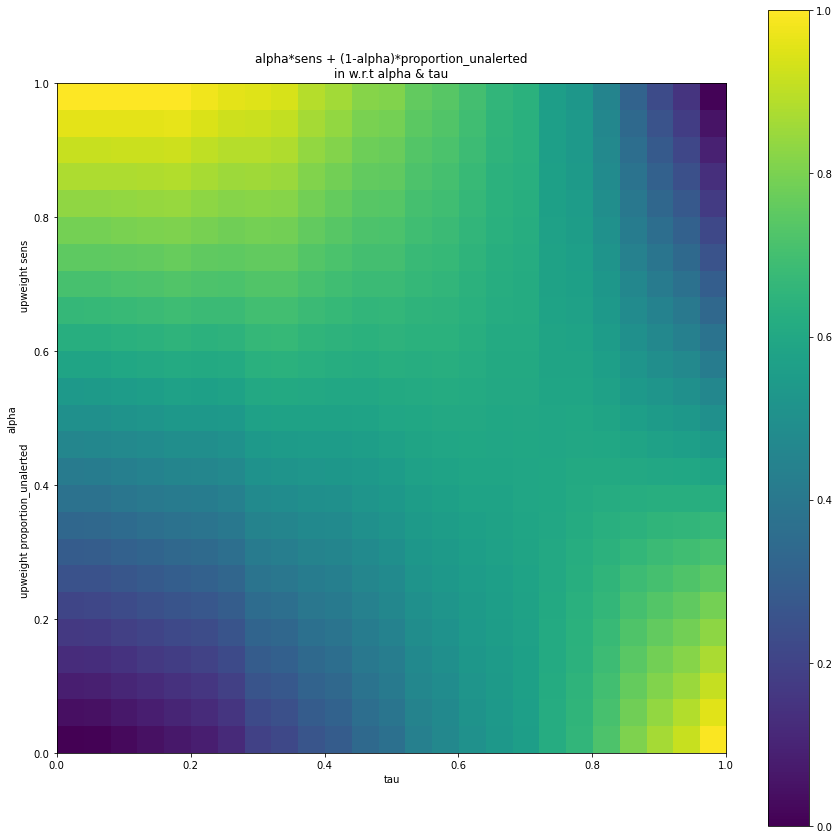

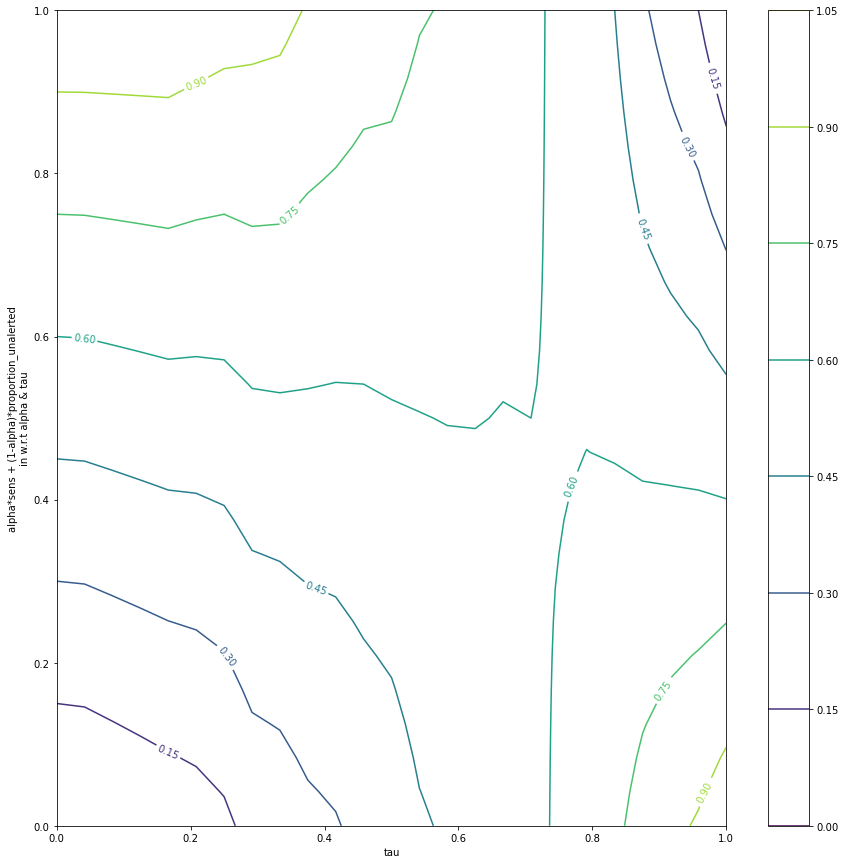

In [11]:
mape.plot_trade_off(ap_res)

# gain

In [12]:
ap_res.head()

,tau,tn,fp,fn,tp,oa_max,oa_min,oa_mean,oa_med,oa_sum,sens,spec,ppv,npv,proportion_unalerted
0,0.000000,0,100,0,100,69,65,66.666667,66.0,200,1.0,0.00,0.500000,NaN,0.000
1,0.041667,1,99,0,100,68,65,66.333333,66.0,199,1.0,0.01,0.502513,1.0,0.005
2,0.083333,5,95,0,100,67,64,65.000000,64.0,195,1.0,0.05,0.512821,1.0,0.025
3,0.125000,9,91,0,100,64,63,63.666667,64.0,191,1.0,0.09,0.523560,1.0,0.045
4,0.166667,13,87,0,100,63,62,62.333333,62.0,187,1.0,0.13,0.534759,1.0,0.065


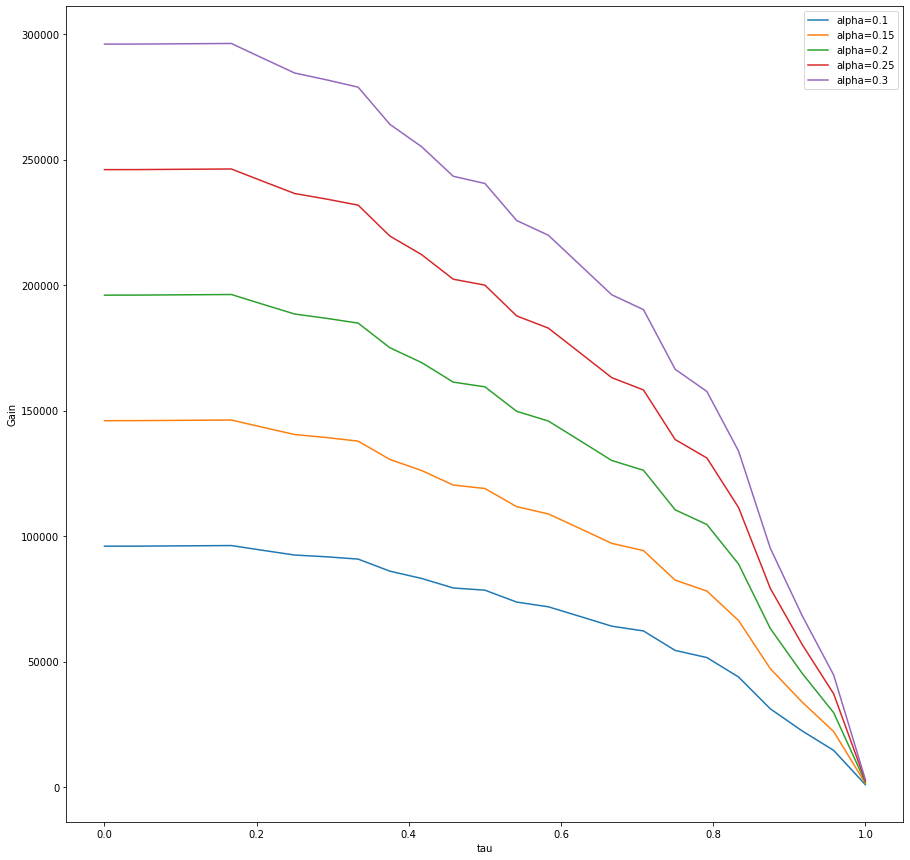

In [13]:
mape.plot_gain(ap_res)

In [14]:
# alerts

In [15]:
oc_res

,observer,tau,n_alerts
0,0,0.000000,66
1,1,0.000000,69
2,2,0.000000,65
3,0,0.041667,66
4,1,0.041667,68
...,...,...,...
70,1,0.958333,6
71,2,0.958333,6
72,0,1.000000,1
73,1,1.000000,0
